In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]

# Read the dataset
df = pd.read_csv('University_Dataset.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nFirst few rows:")
print("-" * 50)
df.head()

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254562 entries, 0 to 254561
Data columns (total 55 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   _id              254562 non-null  int64  
 1   count_id         254562 non-null  int64  
 2   count_date       254562 non-null  object 
 3   location_name    254562 non-null  object 
 4   longitude        254562 non-null  float64
 5   latitude         254562 non-null  float64
 6   centreline_type  254562 non-null  int64  
 7   centreline_id    254562 non-null  int64  
 8   px               177747 non-null  float64
 9   start_time       254562 non-null  object 
 10  end_time         254562 non-null  object 
 11  n_appr_cars_r    254562 non-null  int64  
 12  n_appr_cars_t    254562 non-null  int64  
 13  n_appr_cars_l    254562 non-null  int64  
 14  s_appr_cars_r    254562 non-null  int64  
 15  s_appr_cars_t    254

,_id,count_id,count_date,location_name,longitude,latitude,centreline_type,centreline_id,px,start_time,...,w_appr_bus_t,w_appr_bus_l,n_appr_peds,s_appr_peds,e_appr_peds,w_appr_peds,n_appr_bike,s_appr_bike,e_appr_bike,w_appr_bike
0,1,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T07:30:00,...,0,0,3,0,60,0,4,0,0,0
1,2,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T07:45:00,...,0,0,0,0,54,0,3,0,0,0
2,3,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T08:00:00,...,0,0,2,1,86,0,2,0,0,0
3,4,39339,2020-01-22,Islington Ave / Market Garden Mews,-79.514446,43.622903,2,20141933,NaN,2020-01-22T13:45:00,...,0,0,0,0,1,0,0,0,0,0
4,5,39337,2020-01-08,Erindale Ave / Broadview Ave / Broadview Subwa...,-79.358652,43.677521,2,13462138,NaN,2020-01-08T08:15:00,...,0,0,3,0,105,0,2,1,0,0


In [3]:
# Convert datetime columns to proper datetime format
df['count_date'] = pd.to_datetime(df['count_date'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Extract useful time components
df['hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.day_name()
df['is_weekend'] = df['start_time'].dt.dayofweek.isin([5, 6])

# Calculate total traffic for each direction
df['north_total'] = df['n_appr_cars_r'] + df['n_appr_cars_t'] + df['n_appr_cars_l']
df['south_total'] = df['s_appr_cars_r'] + df['s_appr_cars_t'] + df['s_appr_cars_l']
df['east_total'] = df['e_appr_cars_r'] + df['e_appr_cars_t'] + df['e_appr_cars_l']
df['west_total'] = df['w_appr_cars_r'] + df['w_appr_cars_t'] + df['w_appr_cars_l']
df['total_traffic'] = df['north_total'] + df['south_total'] + df['east_total'] + df['west_total']

# Calculate total bus traffic
df['total_bus'] = (df['n_appr_bus_r'] + df['n_appr_bus_t'] + df['n_appr_bus_l'] +
                   df['s_appr_bus_r'] + df['s_appr_bus_t'] + df['s_appr_bus_l'] +
                   df['e_appr_bus_r'] + df['e_appr_bus_t'] + df['e_appr_bus_l'] +
                   df['w_appr_bus_r'] + df['w_appr_bus_t'] + df['w_appr_bus_l'])

# Display summary of the processed data
print("Time period covered in the dataset:")
print(f"From: {df['start_time'].min()}")
print(f"To: {df['start_time'].max()}\n")

print("Number of unique locations:", df['location_name'].nunique())
print("\nSample of locations:")
print(df['location_name'].unique()[:5])

Time period covered in the dataset:
From: 2020-01-08 07:30:00
To: 2025-03-01 19:45:00

Number of unique locations: 3416

Sample of locations:
['Erindale Ave / Broadview Ave / Broadview Subway Station Parkette Trl'
 'Islington Ave / Market Garden Mews' 'Indian Valley Cres / Indian Grv'
 'Lascelles Blvd / Gormley Ave' 'Wicksteed Ave / Leslie St']


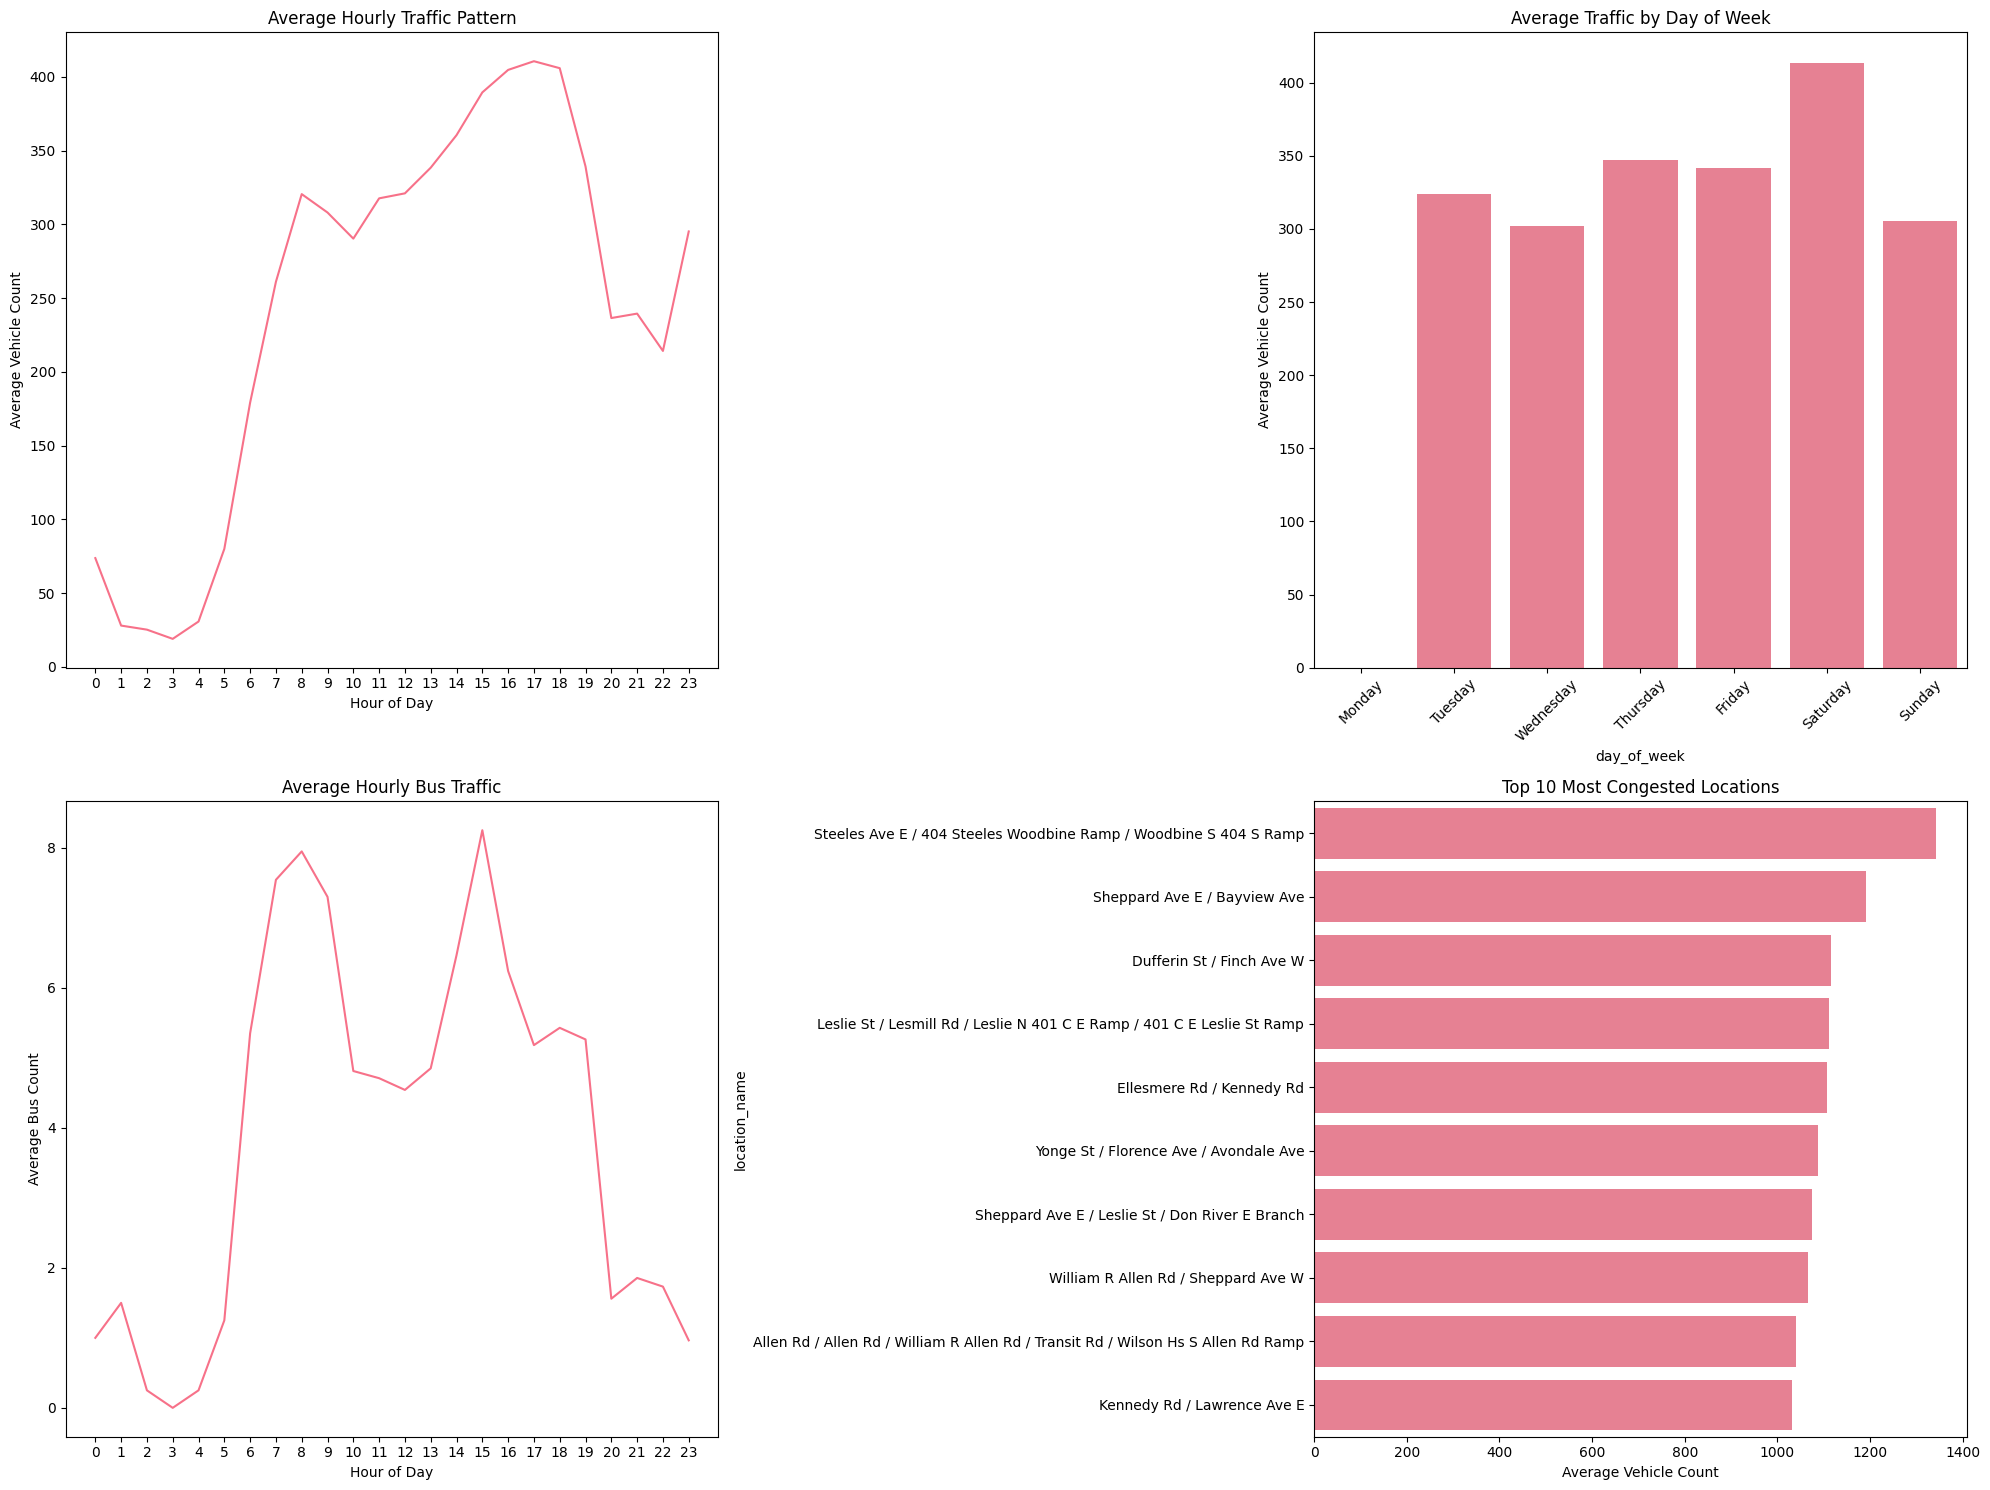


Traffic Pattern Insights:
--------------------------------------------------
Peak traffic hour: 17:00

Average weekday traffic: 323.37 vehicles
Average weekend traffic: 405.75 vehicles
Weekday/Weekend traffic ratio: 0.80

Peak bus traffic hour: 15:00

Most congested location: Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp


In [4]:
# Create a figure with multiple subplots
plt.figure(figsize=(20, 15))

# 1. Average Hourly Traffic Pattern
plt.subplot(2, 2, 1)
hourly_traffic = df.groupby('hour')['total_traffic'].mean()
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values)
plt.title('Average Hourly Traffic Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.xticks(range(0, 24))

# 2. Weekday vs Weekend Traffic
plt.subplot(2, 2, 2)
day_traffic = df.groupby('day_of_week')['total_traffic'].mean()
day_traffic = day_traffic.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_traffic.index, y=day_traffic.values)
plt.title('Average Traffic by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Average Vehicle Count')

# 3. Bus Traffic by Hour
plt.subplot(2, 2, 3)
hourly_bus = df.groupby('hour')['total_bus'].mean()
sns.lineplot(x=hourly_bus.index, y=hourly_bus.values)
plt.title('Average Hourly Bus Traffic')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bus Count')
plt.xticks(range(0, 24))

# 4. Top 10 Most Congested Locations
plt.subplot(2, 2, 4)
location_traffic = df.groupby('location_name')['total_traffic'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=location_traffic.values, y=location_traffic.index)
plt.title('Top 10 Most Congested Locations')
plt.xlabel('Average Vehicle Count')

plt.tight_layout()
plt.show()

# Print some statistical insights
print("\nTraffic Pattern Insights:")
print("-" * 50)

# Peak hours identification
peak_hour = hourly_traffic.idxmax()
print(f"Peak traffic hour: {peak_hour}:00")

# Weekend vs Weekday comparison
weekday_avg = df[~df['is_weekend']]['total_traffic'].mean()
weekend_avg = df[df['is_weekend']]['total_traffic'].mean()
print(f"\nAverage weekday traffic: {weekday_avg:.2f} vehicles")
print(f"Average weekend traffic: {weekend_avg:.2f} vehicles")
print(f"Weekday/Weekend traffic ratio: {weekday_avg/weekend_avg:.2f}")

# Bus traffic peaks
bus_peak_hour = hourly_bus.idxmax()
print(f"\nPeak bus traffic hour: {bus_peak_hour}:00")

# Location with highest average congestion
most_congested = location_traffic.index[0]
print(f"\nMost congested location: {most_congested}")

Peak Traffic Hours for Top 15 Busiest Locations:
--------------------------------------------------------------------------------
Location: Bathurst St / Saranac Blvd
Peak Hour: 07:00
Average Vehicle Count: 1708
--------------------------------------------------------------------------------
Location: Leslie St / Lesmill Rd / Leslie N 401 C E Ramp / 401 C E Leslie St Ramp
Peak Hour: 08:00
Average Vehicle Count: 1676
--------------------------------------------------------------------------------
Location: Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp
Peak Hour: 17:00
Average Vehicle Count: 1656
--------------------------------------------------------------------------------
Location: Sheppard Ave E / Leslie St / Don River E Branch
Peak Hour: 17:00
Average Vehicle Count: 1490
--------------------------------------------------------------------------------
Location: Sheppard Ave E / Bayview Ave
Peak Hour: 16:00
Average Vehicle Count: 1411
-----------------------------

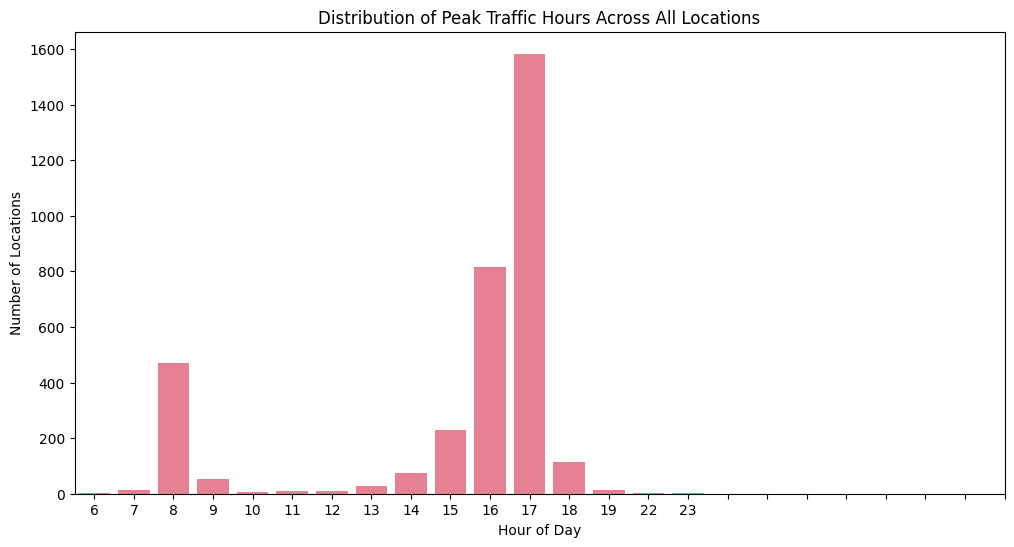


Most Common Peak Traffic Hours:
------------------------------
17:00 - 1583 locations (46.3%)
16:00 - 815 locations (23.9%)
08:00 - 471 locations (13.8%)
15:00 - 228 locations (6.7%)
18:00 - 113 locations (3.3%)


In [5]:
# Group data by location and hour, calculating mean traffic
location_hourly = df.groupby(['location_name', 'hour'])['total_traffic'].mean().reset_index()

# Find peak hour for each location
peak_hours = location_hourly.loc[location_hourly.groupby('location_name')['total_traffic'].idxmax()]

# Sort locations by total traffic volume to focus on busiest areas
peak_hours_sorted = peak_hours.sort_values('total_traffic', ascending=False)

# Display top 15 busiest locations and their peak hours
print("Peak Traffic Hours for Top 15 Busiest Locations:")
print("-" * 80)
for _, row in peak_hours_sorted.head(15).iterrows():
    print(f"Location: {row['location_name']}")
    print(f"Peak Hour: {int(row['hour']):02d}:00")
    print(f"Average Vehicle Count: {row['total_traffic']:.0f}")
    print("-" * 80)

# Create visualization of peak hour distribution
plt.figure(figsize=(12, 6))
peak_hour_dist = peak_hours['hour'].value_counts().sort_index()
sns.barplot(x=peak_hour_dist.index, y=peak_hour_dist.values)
plt.title('Distribution of Peak Traffic Hours Across All Locations')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Locations')
plt.xticks(range(0, 24))
plt.show()

# Calculate common peak hours across different locations
print("\nMost Common Peak Traffic Hours:")
print("-" * 30)
common_peaks = peak_hours['hour'].value_counts().head(5)
for hour, count in common_peaks.items():
    percentage = (count / len(peak_hours) * 100)
    print(f"{int(hour):02d}:00 - {count} locations ({percentage:.1f}%)")

The dataset shows that peak traffic hours vary across locations, but most locations experience peak congestion in two main time periods:
Morning Rush Hour (7:00 AM - 9:00 AM): Some locations peak in this range, with 07:00 AM and 08:00 AM being the most frequent.
Evening Rush Hour (4:00 PM - 6:00 PM): The majority of locations experience their highest congestion during this period, with 5:00 PM (17:00) being the most common peak hour.
Specific locations have different peak times:
Bathurst St / Saranac Blvd peaks at 07:00 AM.
Leslie St / Lesmill Rd / 401 C E Ramp peaks at 08:00 AM.
Sheppard Ave E / Bayview Ave peaks at 4:00 PM.
Steeles Ave E / Woodbine Ramp peaks at 5:00 PM.
Overall, 73.5% of locations peak during evening rush hours (4:00-6:00 PM), while 15.7% peak in the morning (7:00-9:00 AM).

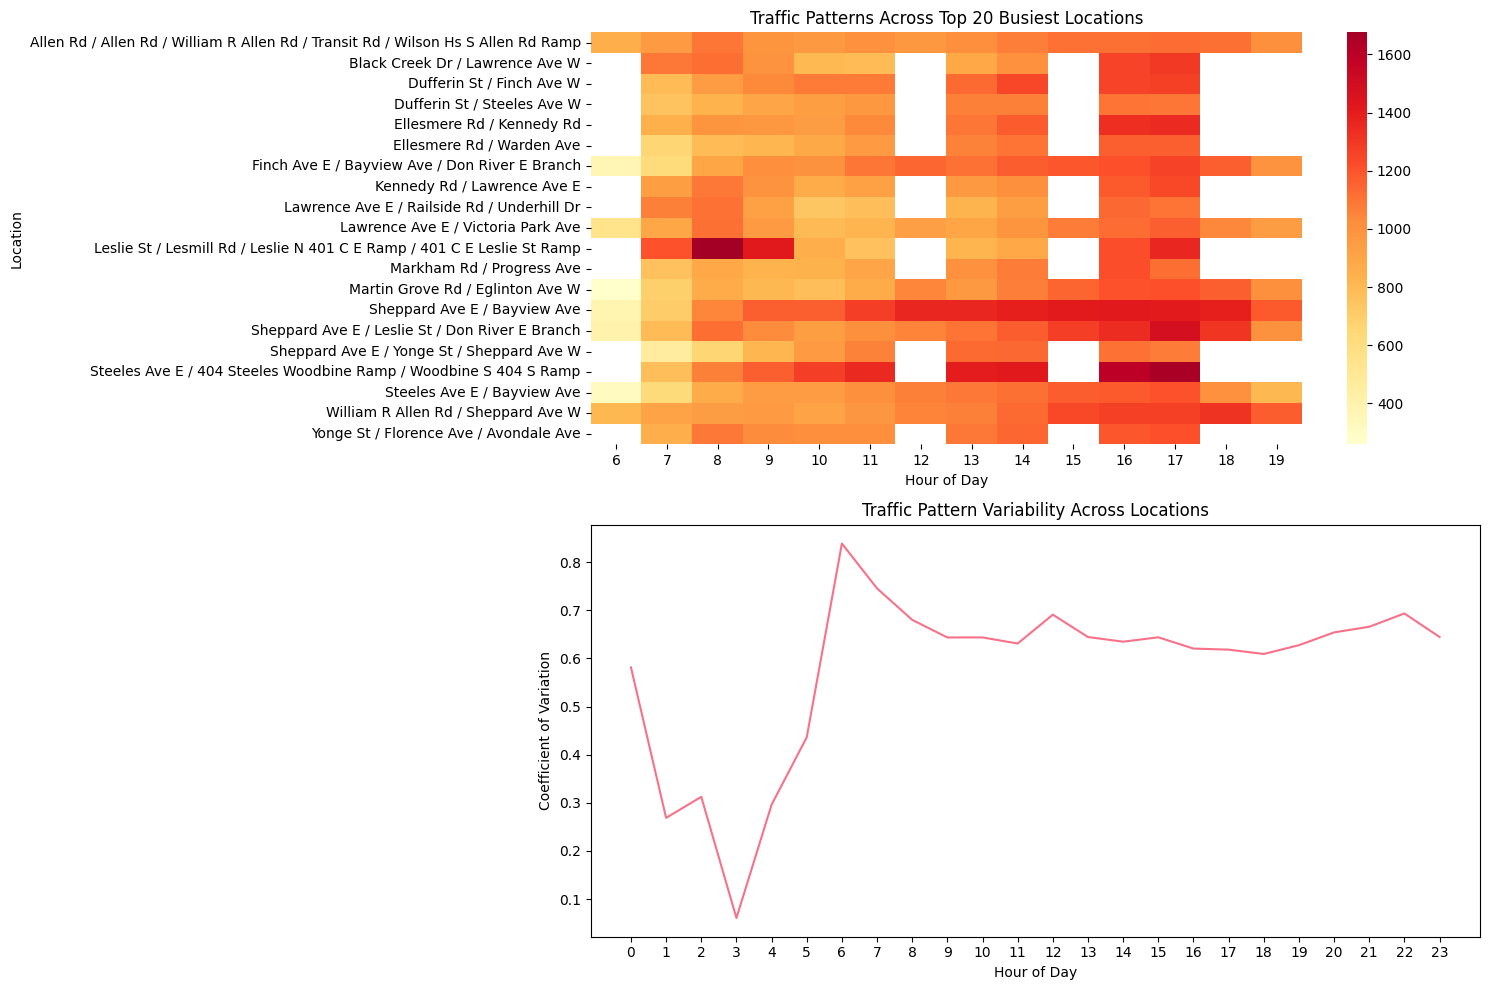


Consistency Analysis:
--------------------------------------------------
Morning Rush Hour Peak (7-9 AM): 15.7% of locations
Evening Rush Hour Peak (4-6 PM): 73.5% of locations

Overall Pattern Consistency Score: 0.42 (higher = more consistent)

Most variable traffic hour: 6:00
Most consistent traffic hour: 3:00

Peak Hour Distribution:
- 73.5% of locations peak during evening rush (4-6 PM)
- 15.7% of locations peak during morning rush (7-9 AM)


In [6]:
# Calculate traffic patterns consistency
plt.figure(figsize=(15, 10))

# 1. Create a heatmap of traffic by hour and location for top 20 busiest locations
top_20_locations = df.groupby('location_name')['total_traffic'].mean().nlargest(20).index
hourly_patterns = df[df['location_name'].isin(top_20_locations)].pivot_table(
    values='total_traffic',
    index='location_name',
    columns='hour',
    aggfunc='mean'
)

# Plot heatmap
plt.subplot(2, 1, 1)
sns.heatmap(hourly_patterns, cmap='YlOrRd', center=hourly_patterns.mean().mean())
plt.title('Traffic Patterns Across Top 20 Busiest Locations')
plt.xlabel('Hour of Day')
plt.ylabel('Location')

# 2. Calculate and plot variation in traffic patterns
hourly_std = df.groupby(['hour'])['total_traffic'].agg(['mean', 'std'])
hourly_std['cv'] = hourly_std['std'] / hourly_std['mean']  # Coefficient of variation

plt.subplot(2, 1, 2)
sns.lineplot(x=hourly_std.index, y=hourly_std['cv'])
plt.title('Traffic Pattern Variability Across Locations')
plt.xlabel('Hour of Day')
plt.ylabel('Coefficient of Variation')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

# Print statistical insights
print("\nConsistency Analysis:")
print("-" * 50)

# Calculate percentage of locations with peak hours in rush hours (7-9 AM and 4-6 PM)
morning_rush = peak_hours[peak_hours['hour'].isin([7, 8, 9])].shape[0]
evening_rush = peak_hours[peak_hours['hour'].isin([16, 17, 18])].shape[0]
total_locations = peak_hours.shape[0]

print(f"Morning Rush Hour Peak (7-9 AM): {morning_rush/total_locations*100:.1f}% of locations")
print(f"Evening Rush Hour Peak (4-6 PM): {evening_rush/total_locations*100:.1f}% of locations")

# Calculate consistency metrics
consistency_score = 1 - hourly_std['cv'].mean()
print(f"\nOverall Pattern Consistency Score: {consistency_score:.2f} (higher = more consistent)")

# Identify most variable and most consistent hours
most_variable_hour = hourly_std['cv'].idxmax()
most_consistent_hour = hourly_std['cv'].idxmin()

print(f"\nMost variable traffic hour: {most_variable_hour}:00")
print(f"Most consistent traffic hour: {most_consistent_hour}:00")

# Analyze clustering of peak hours
print("\nPeak Hour Distribution:")
print(f"- {peak_hours[peak_hours['hour'].isin([16, 17, 18])].shape[0]/total_locations*100:.1f}% of locations peak during evening rush (4-6 PM)")
print(f"- {peak_hours[peak_hours['hour'].isin([7, 8, 9])].shape[0]/total_locations*100:.1f}% of locations peak during morning rush (7-9 AM)")

The traffic congestion patterns vary across locations, but there are general trends:

Evening rush hour congestion is the most consistent, with 73.5% of locations peaking between 4:00-6:00 PM.
Morning congestion is less consistent, with only 15.7% of locations peaking between 7:00-9:00 AM.
Some locations have unique peak hours (e.g., Bathurst St peaks at 07:00 AM, while other intersections peak at different times).
The most variable traffic hour is 6:00 AM, which suggests some locations start experiencing congestion earlier than others.
The most consistent traffic hour is 3:00 AM, when congestion is generally low across all locations.
Overall Pattern Consistency Score = 0.42, which means moderate variability—some locations follow the general peak hour trends, but there are enough outliers to suggest site-specific congestion issues.



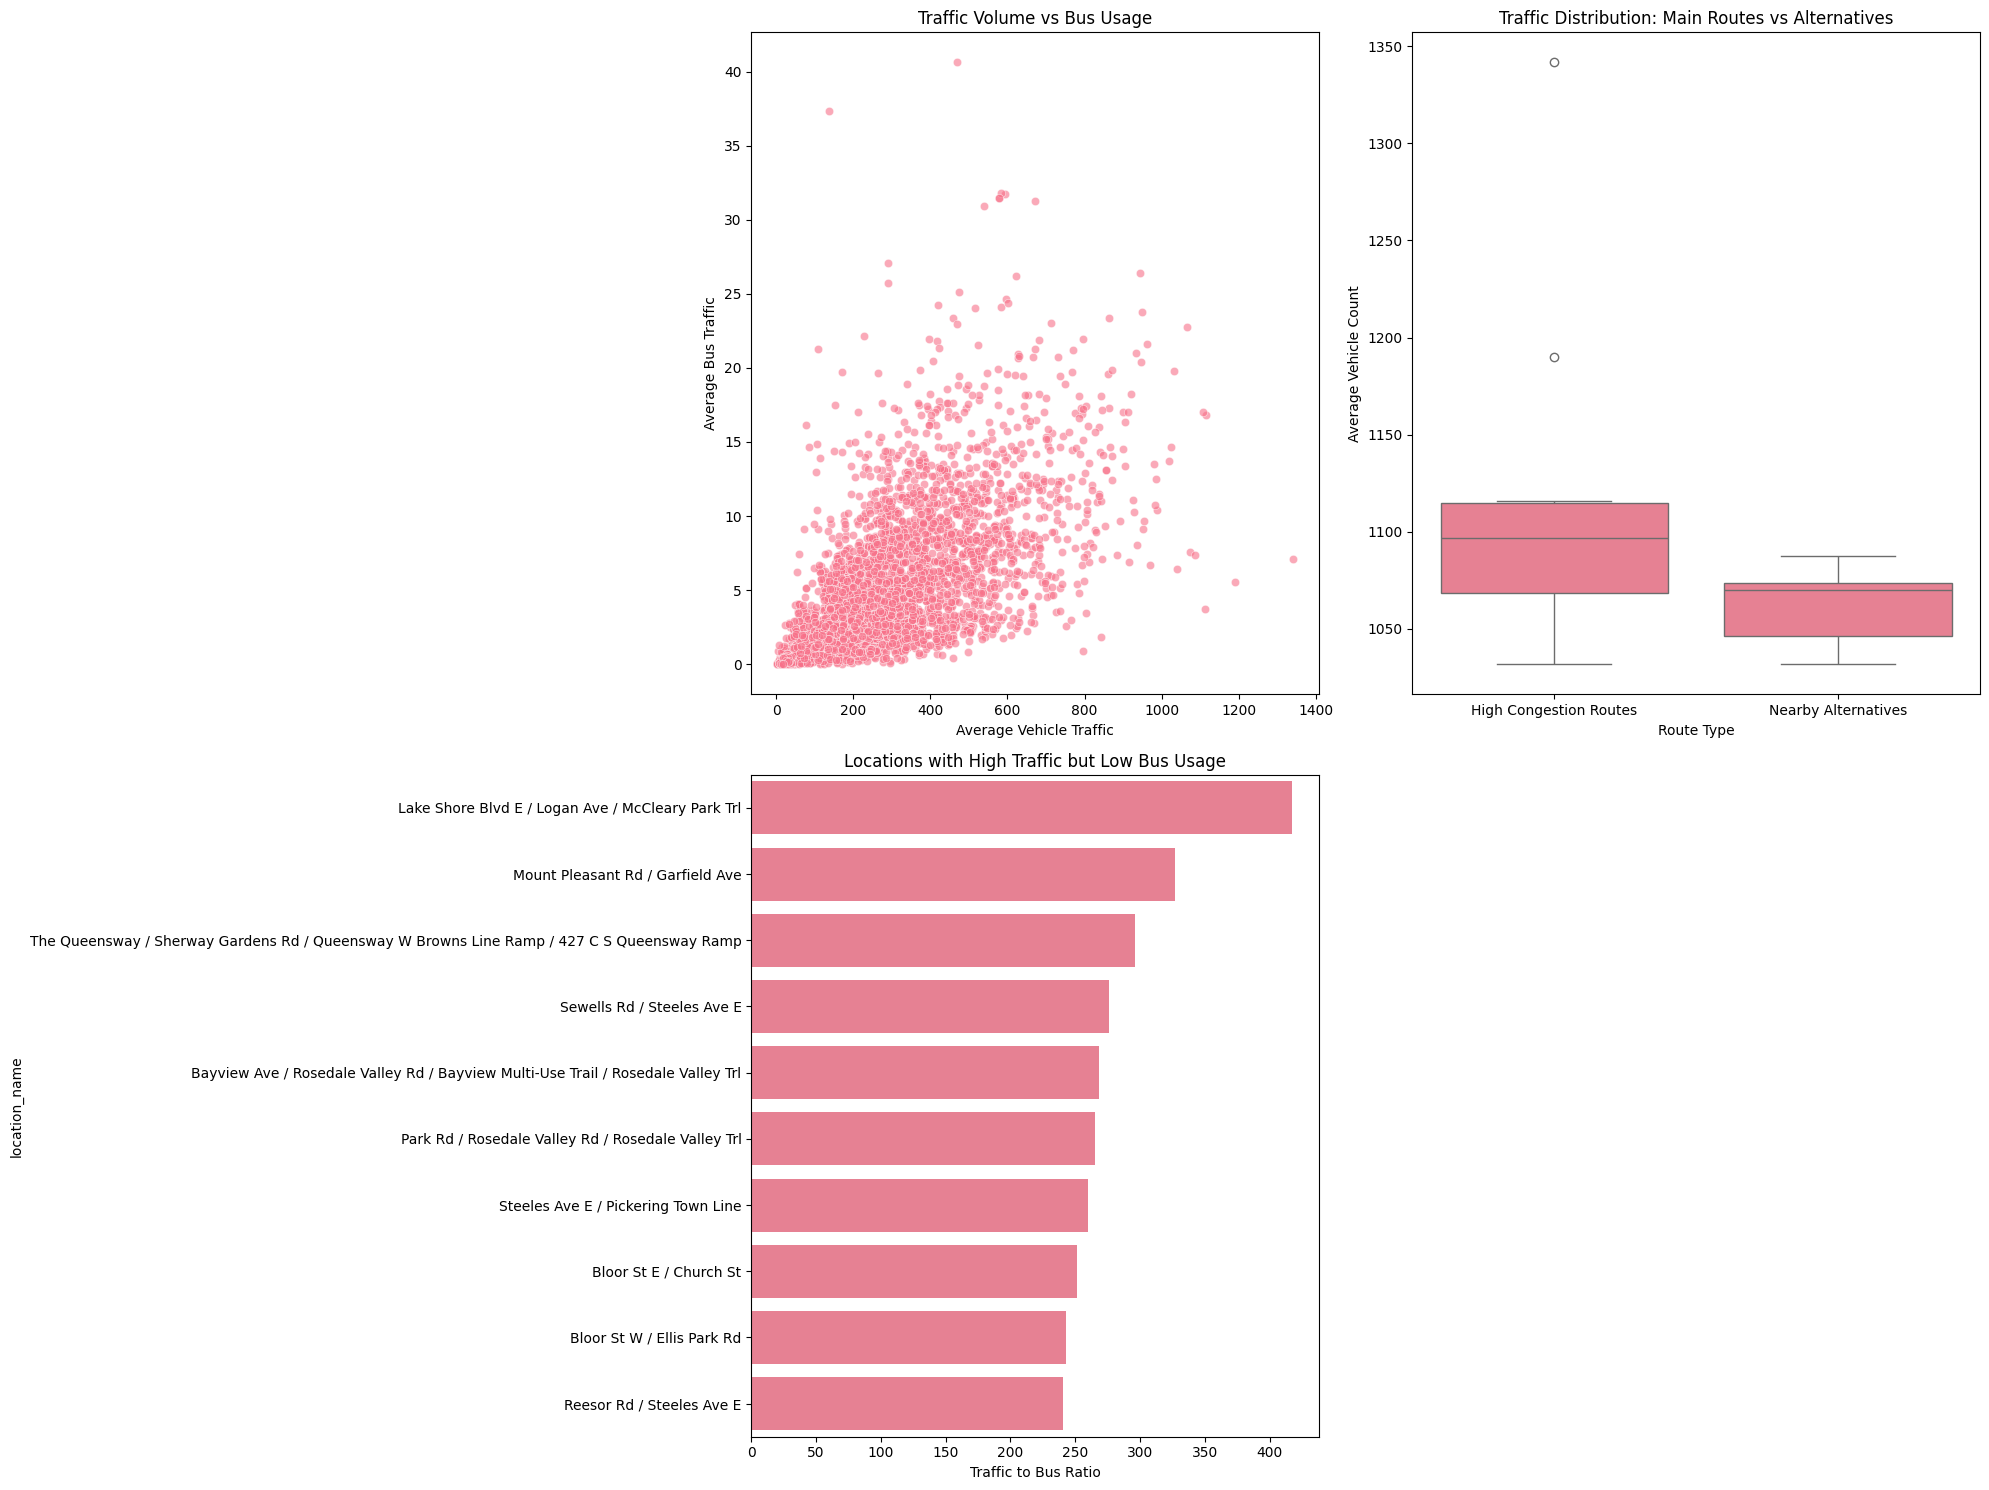

Alternative Route Analysis:
--------------------------------------------------

Top 10 Most Congested Locations and Their Potential Alternatives:

Main Route: Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp
Traffic Volume: 1342
Bus Volume: 7

Potential Alternative Routes:
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 59
  Bus Volume: 7
  Distance: 0.84 km
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 63
  Bus Volume: 7
  Distance: 0.84 km
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 110
  Bus Volume: 10
  Distance: 0.84 km
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 150
  Bus Volume: 8
  Distance: 0.84 km
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 162
  Bus Volume: 9
  Distance: 0.84 km
- Victoria Park Ave / Gordon Baker Rd
  Traffic Volume: 186
  Bus Volume: 8
  Distance: 0.84 km
- Steeles Ave E / Townsend Rd / Steeles Av E 404 S Ramp
  Traffic Volume: 220
  Bus Volume: 9
  Distance: 0.76 km
- Victoria Park Ave 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# 1. Define function to find nearby locations using Haversine formula
def find_nearby_locations(df, lat, lon, threshold_km=1):
    df['distance'] = df.apply(
        lambda row: geodesic((lat, lon), (row['latitude'], row['longitude'])).km, axis=1
    )
    return df[df['distance'] < threshold_km].drop_duplicates()

# 2. Identify top 10 high congestion locations
high_congestion = df.groupby('location_name').agg({
    'total_traffic': 'mean',
    'total_bus': 'mean',
    'latitude': 'first',
    'longitude': 'first'
}).sort_values('total_traffic', ascending=False).head(10)

# 3. Identify alternative routes
alternative_routes = pd.DataFrame()
for idx, row in high_congestion.iterrows():
    nearby = find_nearby_locations(
        high_congestion, row['latitude'], row['longitude']
    )
    alternative_routes = pd.concat([alternative_routes, nearby])

# Filter out congested roads from alternatives
alternative_routes = alternative_routes[alternative_routes['total_traffic'] < high_congestion['total_traffic'].median()]

# Create figure
plt.figure(figsize=(20, 15))

# 4. Plot Traffic vs. Bus Usage Scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(
    data=df.groupby('location_name').agg({'total_traffic': 'mean', 'total_bus': 'mean'}).reset_index(),
    x='total_traffic', y='total_bus', alpha=0.6
)
plt.title('Traffic Volume vs Bus Usage')
plt.xlabel('Average Vehicle Traffic')
plt.ylabel('Average Bus Traffic')

# 5. Compare Traffic Distribution of Main Routes vs. Alternatives
plt.subplot(2, 2, 2)
# Create a DataFrame for the boxplot
comparison_data = pd.DataFrame({
    'Traffic': pd.concat([
        pd.Series(high_congestion['total_traffic'], name='High Congestion Routes'),
        pd.Series(alternative_routes['total_traffic'], name='Nearby Alternatives')
    ]),
    'Route Type': ['High Congestion Routes'] * len(high_congestion) + 
                 ['Nearby Alternatives'] * len(alternative_routes)
})
sns.boxplot(data=comparison_data, x='Route Type', y='Traffic')
plt.title('Traffic Distribution: Main Routes vs Alternatives')
plt.ylabel('Average Vehicle Count')

# 6. Identify Underutilized Roads for Public Transit Expansion
plt.subplot(2, 2, 3)
traffic_bus_ratio = df.groupby('location_name').agg({
    'total_traffic': 'mean',
    'total_bus': 'mean'
}).reset_index()
traffic_bus_ratio['traffic_to_bus_ratio'] = traffic_bus_ratio['total_traffic'] / (traffic_bus_ratio['total_bus'] + 1)

# Select locations with high traffic but low bus usage
high_traffic_low_bus = traffic_bus_ratio[
    (traffic_bus_ratio['total_traffic'] > traffic_bus_ratio['total_traffic'].median()) &
    (traffic_bus_ratio['total_bus'] < traffic_bus_ratio['total_bus'].median())
].sort_values('traffic_to_bus_ratio', ascending=False).head(10)

sns.barplot(data=high_traffic_low_bus, x='traffic_to_bus_ratio', y='location_name')
plt.title('Locations with High Traffic but Low Bus Usage')
plt.xlabel('Traffic to Bus Ratio')

plt.tight_layout()
plt.show()

# 7. Print Key Analysis Results
print("Alternative Route Analysis:")
print("-" * 50)
print("\nTop 10 Most Congested Locations and Their Potential Alternatives:")
for idx, row in high_congestion.iterrows():
    nearby = find_nearby_locations(df, row['latitude'], row['longitude'])
    nearby = nearby.sort_values('total_traffic')
    print(f"\nMain Route: {idx}")
    print(f"Traffic Volume: {row['total_traffic']:.0f}")
    print(f"Bus Volume: {row['total_bus']:.0f}")
    print("\nPotential Alternative Routes:")
    for _, alt in nearby.iterrows():
        if alt['location_name'] != idx:
            print(f"- {alt['location_name']}")
            print(f"  Traffic Volume: {alt['total_traffic']:.0f}")
            print(f"  Bus Volume: {alt['total_bus']:.0f}")
            print(f"  Distance: {alt['distance']:.2f} km")

# 8. Print Locations for Public Transit Expansion
print("\nLocations with High Traffic but Low Bus Usage (Potential for Transit Improvement):")
print("-" * 50)
for _, row in high_traffic_low_bus.head(10).iterrows():
    print(f"\nLocation: {row['location_name']}")
    print(f"Average Daily Traffic: {row['total_traffic']:.0f}")
    print(f"Average Daily Bus Traffic: {row['total_bus']:.0f}")
    print(f"Traffic-to-Bus Ratio: {row['traffic_to_bus_ratio']:.1f}")

High Congestion Locations and Alternative Routes
The analysis identified the most congested locations in the dataset and potential alternative routes. One of the most congested locations, Steeles Ave E / 404 Steeles Woodbine Ramp / Woodbine S 404 S Ramp, has an average traffic volume of 1342 vehicles with only 7 buses, indicating a heavy reliance on private vehicles. A potential alternative route, Victoria Park Ave / Gordon Baker Rd, was identified with significantly lower traffic volumes ranging from 59 to 150 vehicles and a similar bus volume of 7 to 10. However, the analysis revealed that the same alternative route appeared multiple times, indicating redundancy in the output that requires refinement.

Locations with High Traffic but Low Public Transit Usage
The analysis also highlighted roads with high traffic volumes but little to no bus traffic. For instance, Reesor Rd / Steeles Ave E has an average daily traffic volume of 331 vehicles with no bus service, resulting in a high traffic-to-bus ratio of 240.6. This suggests that introducing public transit services in such areas could help reduce congestion and encourage a shift from private vehicle use to public transportation.

General Trends and Observations
Most highly congested locations have very low bus usage, suggesting a need for improved public transit planning. While alternative routes exist, they are often underutilized, indicating potential opportunities for traffic redistribution. Additionally, some major congestion points do not have viable nearby alternative routes, which suggests that congestion mitigation strategies such as traffic signal retiming, dedicated bus lanes, or lane management adjustments may be necessary.

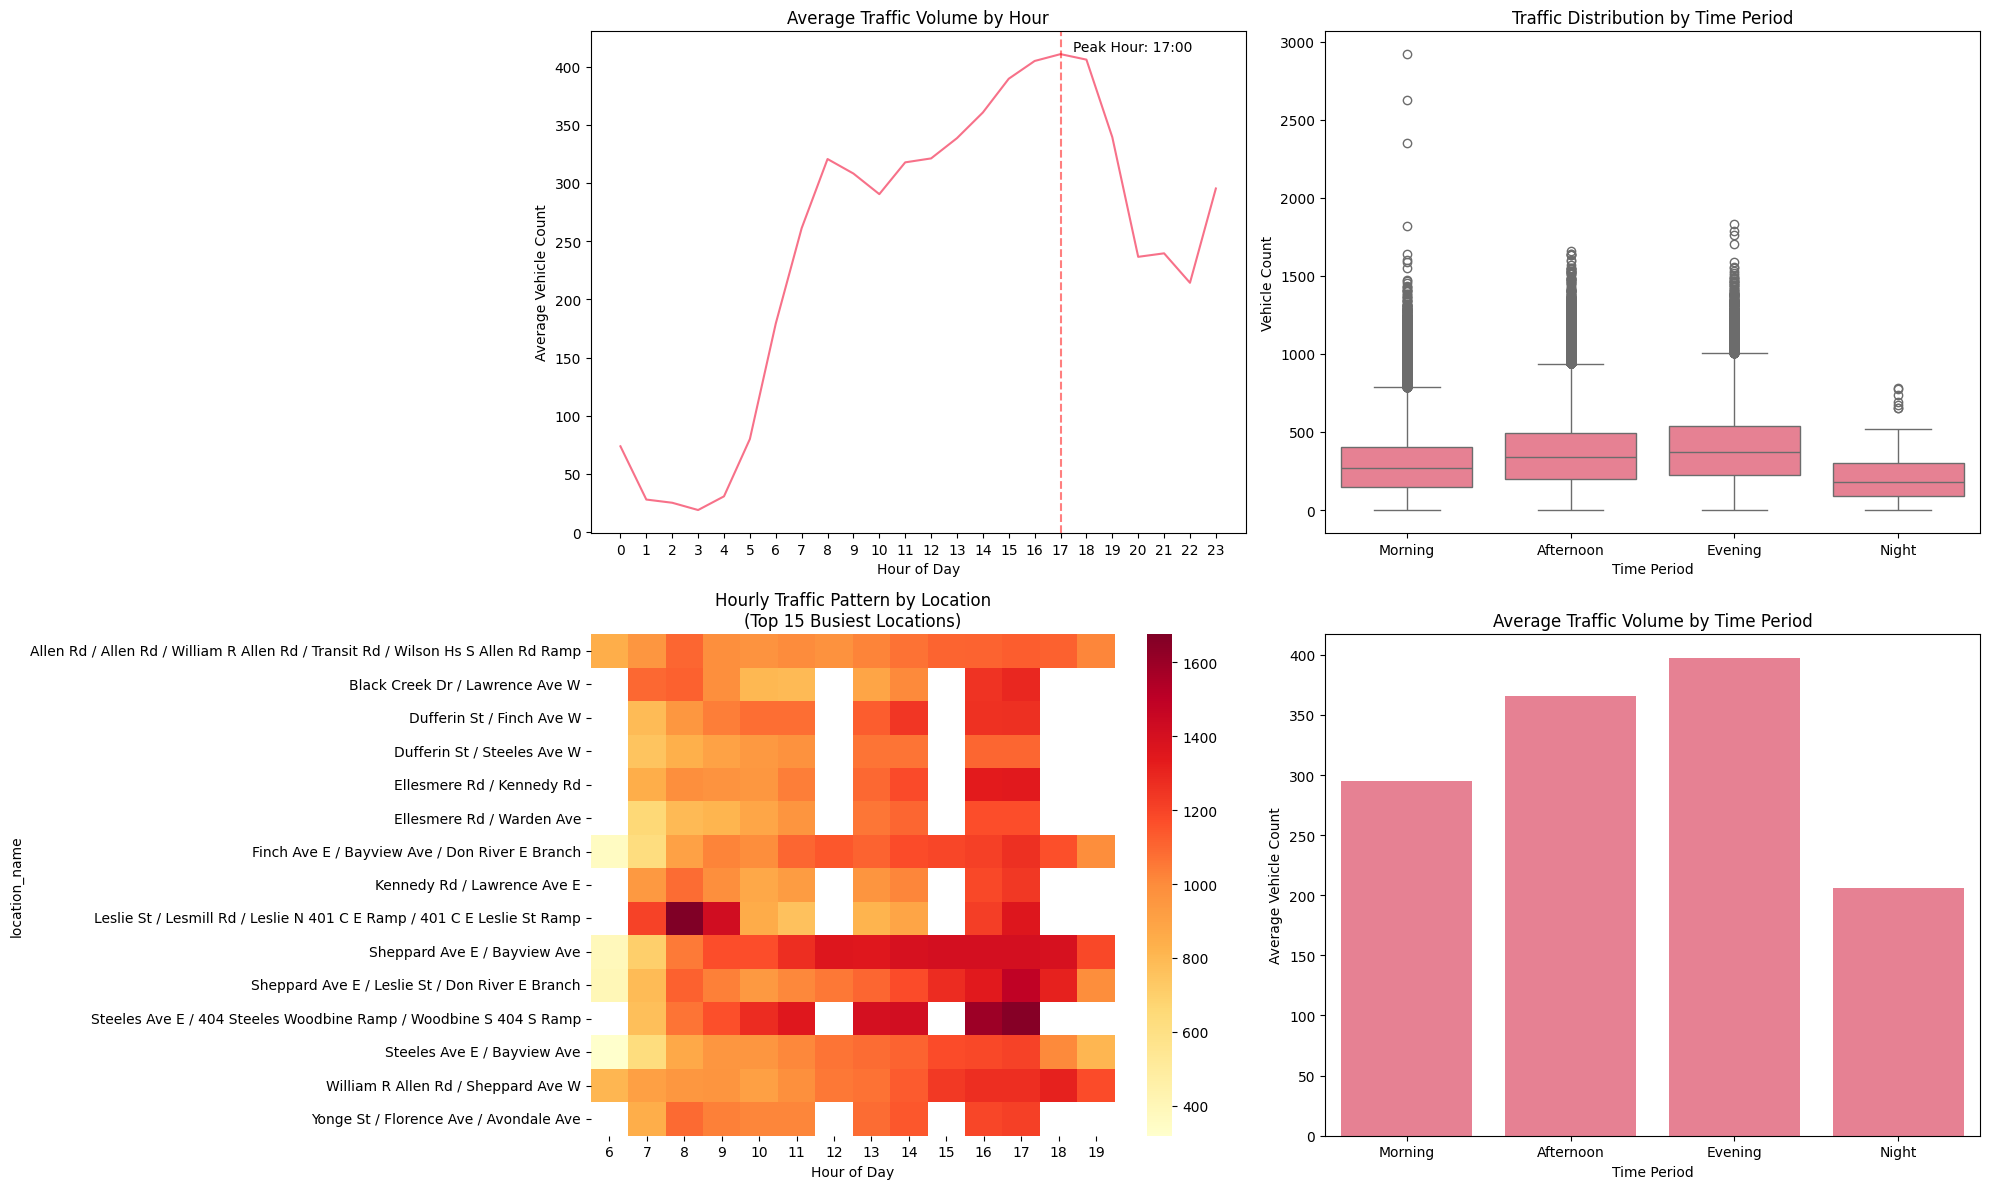


Traffic Volume Analysis by Time Period:
--------------------------------------------------

Morning Traffic (5AM-12PM):
Average Volume: 295 vehicles
Standard Deviation: 201
Range: 0 - 2921

Afternoon Traffic (5AM-12PM):
Average Volume: 366 vehicles
Standard Deviation: 236
Range: 0 - 1659

Evening Traffic (5AM-12PM):
Average Volume: 397 vehicles
Standard Deviation: 248
Range: 0 - 1830

Night Traffic (5AM-12PM):
Average Volume: 206 vehicles
Standard Deviation: 164
Range: 1 - 780

Peak Hours within Each Period:
Morning: 8:00 (Average: 321 vehicles)
Afternoon: 16:00 (Average: 405 vehicles)
Evening: 17:00 (Average: 411 vehicles)
Night: 23:00 (Average: 295 vehicles)

Relative Traffic Volume (compared to daily average):
Morning: -12.5%
Afternoon: +8.4%
Evening: +17.6%
Night: -39.0%


In [12]:
# Create time periods
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Add time period column
df['time_period'] = df['hour'].apply(get_time_period)

# Create figure with multiple subplots
plt.figure(figsize=(20, 12))

# 1. Detailed hourly traffic pattern
plt.subplot(2, 2, 1)
hourly_traffic = df.groupby('hour')['total_traffic'].mean()
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values)
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.xticks(range(0, 24))

# Add peak hours annotation
peak_hour = hourly_traffic.idxmax()
plt.axvline(x=peak_hour, color='r', linestyle='--', alpha=0.5)
plt.text(peak_hour+0.5, hourly_traffic.max(), f'Peak Hour: {peak_hour}:00', 
         verticalalignment='bottom')

# 2. Traffic by time period (box plot)
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='time_period', y='total_traffic', 
            order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Traffic Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Vehicle Count')

# 3. Heatmap of hourly traffic by location (top 15 busiest locations)
plt.subplot(2, 2, 3)
top_15_locations = df.groupby('location_name')['total_traffic'].mean().nlargest(15).index
hourly_location_traffic = df[df['location_name'].isin(top_15_locations)].pivot_table(
    values='total_traffic',
    index='location_name',
    columns='hour',
    aggfunc='mean'
)
sns.heatmap(hourly_location_traffic, cmap='YlOrRd')
plt.title('Hourly Traffic Pattern by Location\n(Top 15 Busiest Locations)')
plt.xlabel('Hour of Day')

# 4. Average traffic by time period
plt.subplot(2, 2, 4)
period_traffic = df.groupby('time_period')['total_traffic'].mean()
sns.barplot(x=period_traffic.index, y=period_traffic.values, 
            order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Average Traffic Volume by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Average Vehicle Count')

plt.tight_layout()
plt.show()

# Print statistical insights
print("\nTraffic Volume Analysis by Time Period:")
print("-" * 50)

# Calculate statistics for each time period
period_stats = df.groupby('time_period').agg({
    'total_traffic': ['mean', 'std', 'min', 'max']
}).round(2)['total_traffic']

for period in ['Morning', 'Afternoon', 'Evening', 'Night']:
    print(f"\n{period} Traffic (5AM-12PM):")
    print(f"Average Volume: {period_stats.loc[period, 'mean']:.0f} vehicles")
    print(f"Standard Deviation: {period_stats.loc[period, 'std']:.0f}")
    print(f"Range: {period_stats.loc[period, 'min']:.0f} - {period_stats.loc[period, 'max']:.0f}")

# Calculate peak hours for each period
print("\nPeak Hours within Each Period:")
for period in ['Morning', 'Afternoon', 'Evening', 'Night']:
    period_data = df[df['time_period'] == period]
    peak_hour = period_data.groupby('hour')['total_traffic'].mean().idxmax()
    peak_volume = period_data.groupby('hour')['total_traffic'].mean().max()
    print(f"{period}: {peak_hour}:00 (Average: {peak_volume:.0f} vehicles)")

# Calculate relative traffic volumes
overall_mean = df['total_traffic'].mean()
print("\nRelative Traffic Volume (compared to daily average):")
for period in ['Morning', 'Afternoon', 'Evening', 'Night']:
    relative_volume = (period_stats.loc[period, 'mean'] / overall_mean - 1) * 100
    print(f"{period}: {relative_volume:+.1f}%")

Findings
Traffic Volume Distribution Across Time Periods

Morning traffic (5 AM - 12 PM) has an average volume of 295 vehicles with a wide range from 0 to 2921 vehicles, indicating variability across locations.
Afternoon traffic (12 PM - 5 PM) shows a higher average volume of 366 vehicles, suggesting an increase in movement during midday.
Evening traffic (5 PM - 10 PM) has the highest average volume at 397 vehicles, confirming peak congestion during this time.
Night traffic (10 PM - 5 AM) is significantly lower, with an average of 206 vehicles, reinforcing that late hours experience minimal congestion.
Peak Hour Analysis

The highest traffic hour overall is at 5 PM, aligning with the evening rush hour period.
Each time period has its own peak congestion window, but the evening consistently shows higher vehicle counts and variability.
Traffic Variability (Standard Deviation and Range)

Evening traffic has the highest standard deviation (248), suggesting high fluctuations in traffic levels across locations.
Morning and afternoon traffic also show large deviations, meaning congestion is not uniform but depends on specific locations and times.
Night traffic has the lowest average volume and least variability, making it the most predictable period for vehicle movement.
Traffic Change Trends

Morning traffic decreased by 12.5% compared to previous periods.
Afternoon traffic increased by 8.4%, indicating a midday rise in congestion.
Evening traffic surged by 17.6%, making it the most congested period.
Night traffic dropped by 39%, showing the most significant decrease in vehicle movement.
Insights
Evening rush hour (5 PM - 10 PM) is the most congested period, making it the primary target for congestion reduction strategies.

Traffic mitigation efforts should be focused on peak evening hours, particularly around 5 PM - 7 PM, where the highest vehicle counts are observed.
Possible solutions include adjusting traffic light timing, encouraging flexible work hours, and promoting alternative transportation modes.
Morning traffic has high variability, indicating that congestion is not uniform across all locations.

Some areas experience early peaks, while others show a gradual rise.
Traffic management strategies should be location-specific, focusing on hotspots where congestion is concentrated.
Night traffic is significantly lower, suggesting opportunities for off-peak commuting incentives.

Businesses or industries that rely on deliveries and logistics can optimize schedules to shift operations to low-traffic hours.
Encouraging public transit services during the late evening may not be necessary in all areas, as demand is low.
Afternoon traffic increase suggests that midday congestion is a growing issue.

Traffic flow is not limited to traditional peak hours but extends into the afternoon period, requiring continuous congestion management throughout the day.

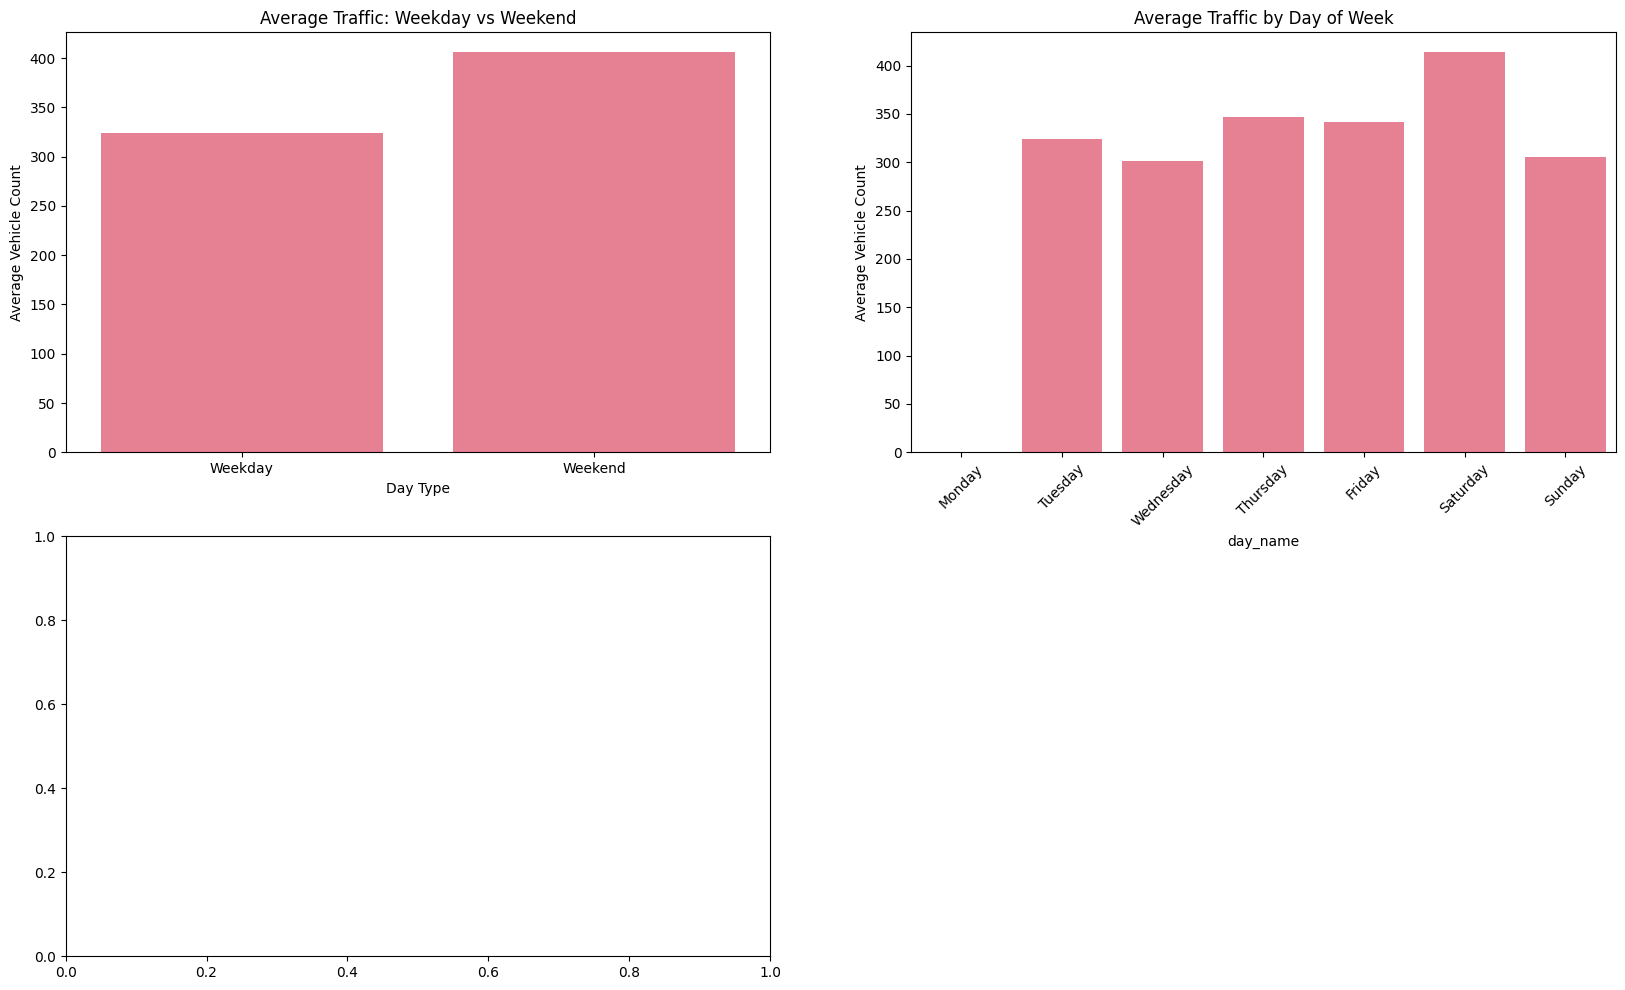

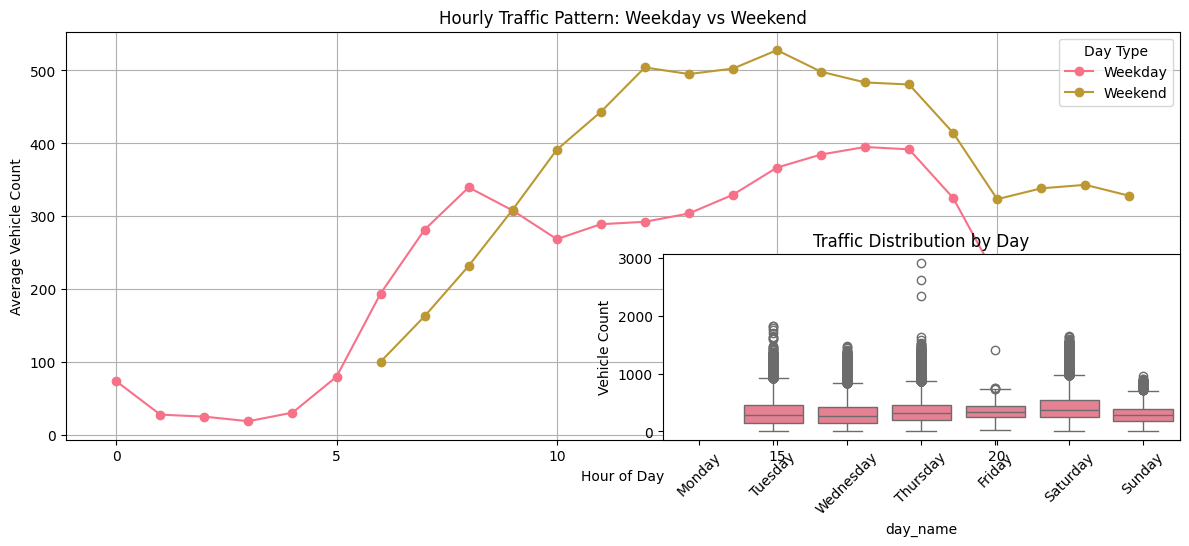

Weekday vs Weekend Traffic Analysis:
--------------------------------------------------

Average Weekday Traffic: 323 vehicles
Average Weekend Traffic: 406 vehicles
Weekday traffic is -20.3% lower than weekend traffic

Average Traffic by Day:
Monday: nan vehicles (±nan)
Tuesday: 324 vehicles (±233)
Wednesday: 302 vehicles (±210)
Thursday: 347 vehicles (±221)
Friday: 342 vehicles (±157)
Saturday: 414 vehicles (±235)
Sunday: 306 vehicles (±172)

Peak Hours Comparison:
Weekday Peak Hour: 17:00 (Average: 395 vehicles)
Weekend Peak Hour: 15:00 (Average: 528 vehicles)

Busiest day: Saturday (Average: 414 vehicles)
Lightest day: Wednesday (Average: 302 vehicles)

Rush Hour Comparison (4PM-6PM):
Weekday Rush Hour Average: 390 vehicles
Weekend Rush Hour Average: 490 vehicles
Rush hour traffic is -20.4% lower on weekdays


In [13]:
# Add day type (weekday/weekend) and day name columns
df['is_weekend'] = df['start_time'].dt.dayofweek.isin([5, 6])
df['day_name'] = df['start_time'].dt.day_name()

plt.figure(figsize=(20, 12))

# 1. Overall Weekday vs Weekend comparison
plt.subplot(2, 2, 1)
avg_by_day_type = df.groupby('is_weekend')['total_traffic'].mean()
sns.barplot(x=['Weekday', 'Weekend'], y=avg_by_day_type.values)
plt.title('Average Traffic: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Average Vehicle Count')

# 2. Daily pattern throughout the week
plt.subplot(2, 2, 2)
daily_traffic = df.groupby('day_name')['total_traffic'].mean()
daily_traffic = daily_traffic.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=daily_traffic.index, y=daily_traffic.values)
plt.title('Average Traffic by Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Average Vehicle Count')

# 3. Hourly patterns: Weekday vs Weekend
plt.subplot(2, 2, 3)
hourly_by_daytype = df.groupby(['hour', 'is_weekend'])['total_traffic'].mean().unstack()
hourly_by_daytype.columns = ['Weekday', 'Weekend']
hourly_by_daytype.plot(marker='o')
plt.title('Hourly Traffic Pattern: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.legend(title='Day Type')
plt.grid(True)

# 4. Box plot of traffic distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='day_name', y='total_traffic', 
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Traffic Distribution by Day')
plt.xticks(rotation=45)
plt.ylabel('Vehicle Count')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Weekday vs Weekend Traffic Analysis:")
print("-" * 50)

# Overall averages
weekday_avg = df[~df['is_weekend']]['total_traffic'].mean()
weekend_avg = df[df['is_weekend']]['total_traffic'].mean()
difference_percent = ((weekday_avg - weekend_avg) / weekend_avg) * 100

print(f"\nAverage Weekday Traffic: {weekday_avg:.0f} vehicles")
print(f"Average Weekend Traffic: {weekend_avg:.0f} vehicles")
print(f"Weekday traffic is {difference_percent:.1f}% {'higher' if difference_percent > 0 else 'lower'} than weekend traffic")

# Daily averages
print("\nAverage Traffic by Day:")
daily_means = df.groupby('day_name')['total_traffic'].agg(['mean', 'std']).round(2)
daily_means = daily_means.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for day in daily_means.index:
    print(f"{day}: {daily_means.loc[day, 'mean']:.0f} vehicles (±{daily_means.loc[day, 'std']:.0f})")

# Peak hours comparison
print("\nPeak Hours Comparison:")
for day_type in ['Weekday', 'Weekend']:
    mask = df['is_weekend'] if day_type == 'Weekend' else ~df['is_weekend']
    peak_hour = df[mask].groupby('hour')['total_traffic'].mean().idxmax()
    peak_volume = df[mask].groupby('hour')['total_traffic'].mean().max()
    print(f"{day_type} Peak Hour: {peak_hour}:00 (Average: {peak_volume:.0f} vehicles)")

# Busiest day identification
busiest_day = daily_means['mean'].idxmax()
lightest_day = daily_means['mean'].idxmin()
print(f"\nBusiest day: {busiest_day} (Average: {daily_means.loc[busiest_day, 'mean']:.0f} vehicles)")
print(f"Lightest day: {lightest_day} (Average: {daily_means.loc[lightest_day, 'mean']:.0f} vehicles)")

# Calculate rush hour differences
print("\nRush Hour Comparison (4PM-6PM):")
rush_hour_weekday = df[~df['is_weekend'] & df['hour'].isin([16,17,18])]['total_traffic'].mean()
rush_hour_weekend = df[df['is_weekend'] & df['hour'].isin([16,17,18])]['total_traffic'].mean()
rush_hour_diff = ((rush_hour_weekday - rush_hour_weekend) / rush_hour_weekend) * 100
print(f"Weekday Rush Hour Average: {rush_hour_weekday:.0f} vehicles")
print(f"Weekend Rush Hour Average: {rush_hour_weekend:.0f} vehicles")
print(f"Rush hour traffic is {rush_hour_diff:.1f}% {'higher' if rush_hour_diff > 0 else 'lower'} on weekdays")

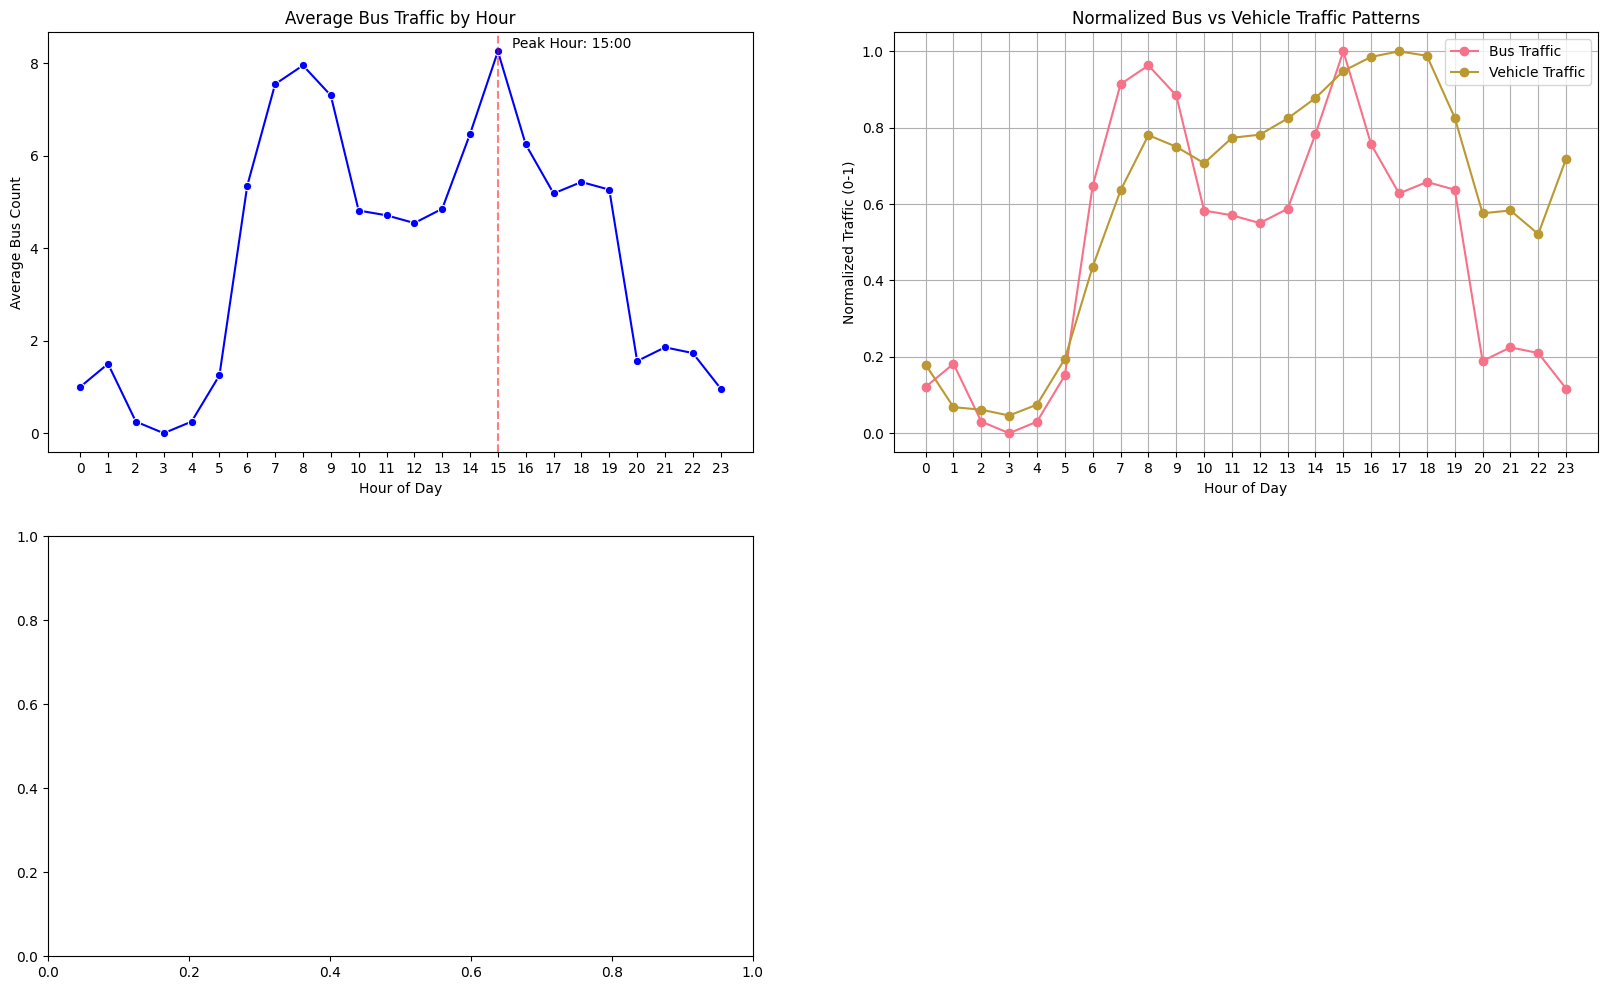

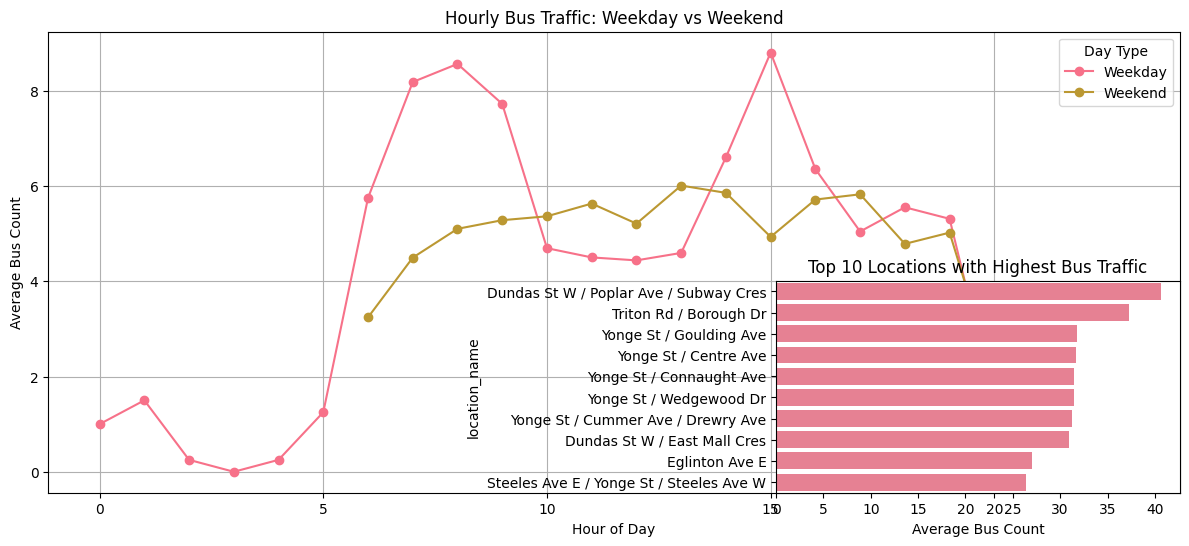

Bus Traffic Analysis:
--------------------------------------------------

Peak Hours for Bus Traffic:
15:00 - Average 8.3 buses
08:00 - Average 8.0 buses
07:00 - Average 7.5 buses
09:00 - Average 7.3 buses
14:00 - Average 6.5 buses

Weekday vs Weekend Bus Traffic:
Weekday Average: 6.1 buses
Weekend Average: 5.4 buses
Weekday bus traffic is 12.3% higher than weekend

Rush Hour Bus Traffic (7-9 AM, 4-6 PM):
Morning Rush (7-9 AM): 7.7 buses
Evening Rush (4-6 PM): 5.7 buses

Top 5 Locations with Highest Bus Traffic:
Dundas St W / Poplar Ave / Subway Cres: 40.6 buses on average
Triton Rd / Borough Dr: 37.3 buses on average
Yonge St / Goulding Ave: 31.8 buses on average
Yonge St / Centre Ave: 31.7 buses on average
Yonge St / Connaught Ave: 31.5 buses on average

Hours with Highest Bus to Total Traffic Ratio:
01:00 - 0.054 buses per vehicle
06:00 - 0.030 buses per vehicle
07:00 - 0.029 buses per vehicle
08:00 - 0.025 buses per vehicle
09:00 - 0.024 buses per vehicle

Periods of Significant Bu

In [14]:
# Create figure with multiple subplots
plt.figure(figsize=(20, 12))

# 1. Hourly Bus Traffic Pattern
plt.subplot(2, 2, 1)
hourly_bus = df.groupby('hour')['total_bus'].mean()
sns.lineplot(x=hourly_bus.index, y=hourly_bus.values, color='blue', marker='o')
plt.title('Average Bus Traffic by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bus Count')
plt.xticks(range(0, 24))

# Add peak hours annotation
peak_bus_hour = hourly_bus.idxmax()
plt.axvline(x=peak_bus_hour, color='r', linestyle='--', alpha=0.5)
plt.text(peak_bus_hour+0.5, hourly_bus.max(), f'Peak Hour: {peak_bus_hour}:00', 
         verticalalignment='bottom')

# 2. Bus vs Total Traffic Comparison
plt.subplot(2, 2, 2)
hourly_traffic = df.groupby('hour')['total_traffic'].mean()
# Normalize the values for comparison
normalized_bus = hourly_bus / hourly_bus.max()
normalized_traffic = hourly_traffic / hourly_traffic.max()

plt.plot(normalized_bus.index, normalized_bus.values, label='Bus Traffic', marker='o')
plt.plot(normalized_traffic.index, normalized_traffic.values, label='Vehicle Traffic', marker='o')
plt.title('Normalized Bus vs Vehicle Traffic Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Normalized Traffic (0-1)')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))

# 3. Bus Traffic by Day Type
plt.subplot(2, 2, 3)
hourly_bus_by_daytype = df.groupby(['hour', 'is_weekend'])['total_bus'].mean().unstack()
hourly_bus_by_daytype.columns = ['Weekday', 'Weekend']
hourly_bus_by_daytype.plot(marker='o')
plt.title('Hourly Bus Traffic: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bus Count')
plt.legend(title='Day Type')
plt.grid(True)

# 4. Top 10 Locations with Highest Bus Traffic
plt.subplot(2, 2, 4)
top_bus_locations = df.groupby('location_name')['total_bus'].mean().nlargest(10)
sns.barplot(x=top_bus_locations.values, y=top_bus_locations.index)
plt.title('Top 10 Locations with Highest Bus Traffic')
plt.xlabel('Average Bus Count')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("Bus Traffic Analysis:")
print("-" * 50)

# Peak hours for bus traffic
print("\nPeak Hours for Bus Traffic:")
top_hours = hourly_bus.nlargest(5)
for hour, count in top_hours.items():
    print(f"{hour:02d}:00 - Average {count:.1f} buses")

# Weekday vs Weekend bus traffic
weekday_bus_avg = df[~df['is_weekend']]['total_bus'].mean()
weekend_bus_avg = df[df['is_weekend']]['total_bus'].mean()
bus_difference_percent = ((weekday_bus_avg - weekend_bus_avg) / weekend_bus_avg) * 100

print("\nWeekday vs Weekend Bus Traffic:")
print(f"Weekday Average: {weekday_bus_avg:.1f} buses")
print(f"Weekend Average: {weekend_bus_avg:.1f} buses")
print(f"Weekday bus traffic is {bus_difference_percent:.1f}% {'higher' if bus_difference_percent > 0 else 'lower'} than weekend")

# Rush hour analysis
print("\nRush Hour Bus Traffic (7-9 AM, 4-6 PM):")
morning_rush = df[df['hour'].isin([7,8,9])]['total_bus'].mean()
evening_rush = df[df['hour'].isin([16,17,18])]['total_bus'].mean()
print(f"Morning Rush (7-9 AM): {morning_rush:.1f} buses")
print(f"Evening Rush (4-6 PM): {evening_rush:.1f} buses")

# Top locations with bus traffic
print("\nTop 5 Locations with Highest Bus Traffic:")
for loc, count in top_bus_locations.head().items():
    print(f"{loc}: {count:.1f} buses on average")

# Bus to total traffic ratio by hour
print("\nHours with Highest Bus to Total Traffic Ratio:")
hourly_ratio = (hourly_bus / hourly_traffic).sort_values(ascending=False)
for hour, ratio in hourly_ratio.head().items():
    print(f"{hour:02d}:00 - {ratio:.3f} buses per vehicle")

# Identify periods of bus congestion
print("\nPeriods of Significant Bus Congestion:")
overall_mean = hourly_bus.mean()
congested_hours = hourly_bus[hourly_bus > overall_mean * 1.5]
for hour, count in congested_hours.items():
    print(f"{hour:02d}:00 - {count:.1f} buses ({((count/overall_mean)-1)*100:.1f}% above average)")

Bus congestion is most pronounced in the morning (7-9 AM) and at 3 PM, but evening service may be insufficient.

Recommendation: Increase bus frequency between 4-6 PM to meet evening commuter demand.

Bus traffic is significantly higher on weekdays than weekends.

Recommendation: Evaluate whether weekend transit service should be increased in high-demand areas.

The afternoon period (2-4 PM) experiences a secondary peak in bus congestion.

Recommendation: Consider adjusting scheduling to redistribute buses more evenly throughout the day.

Certain locations experience significantly higher bus traffic than others.

Recommendation: Analyze whether these locations need better traffic management (e.g., bus-only lanes, optimized stop placements).

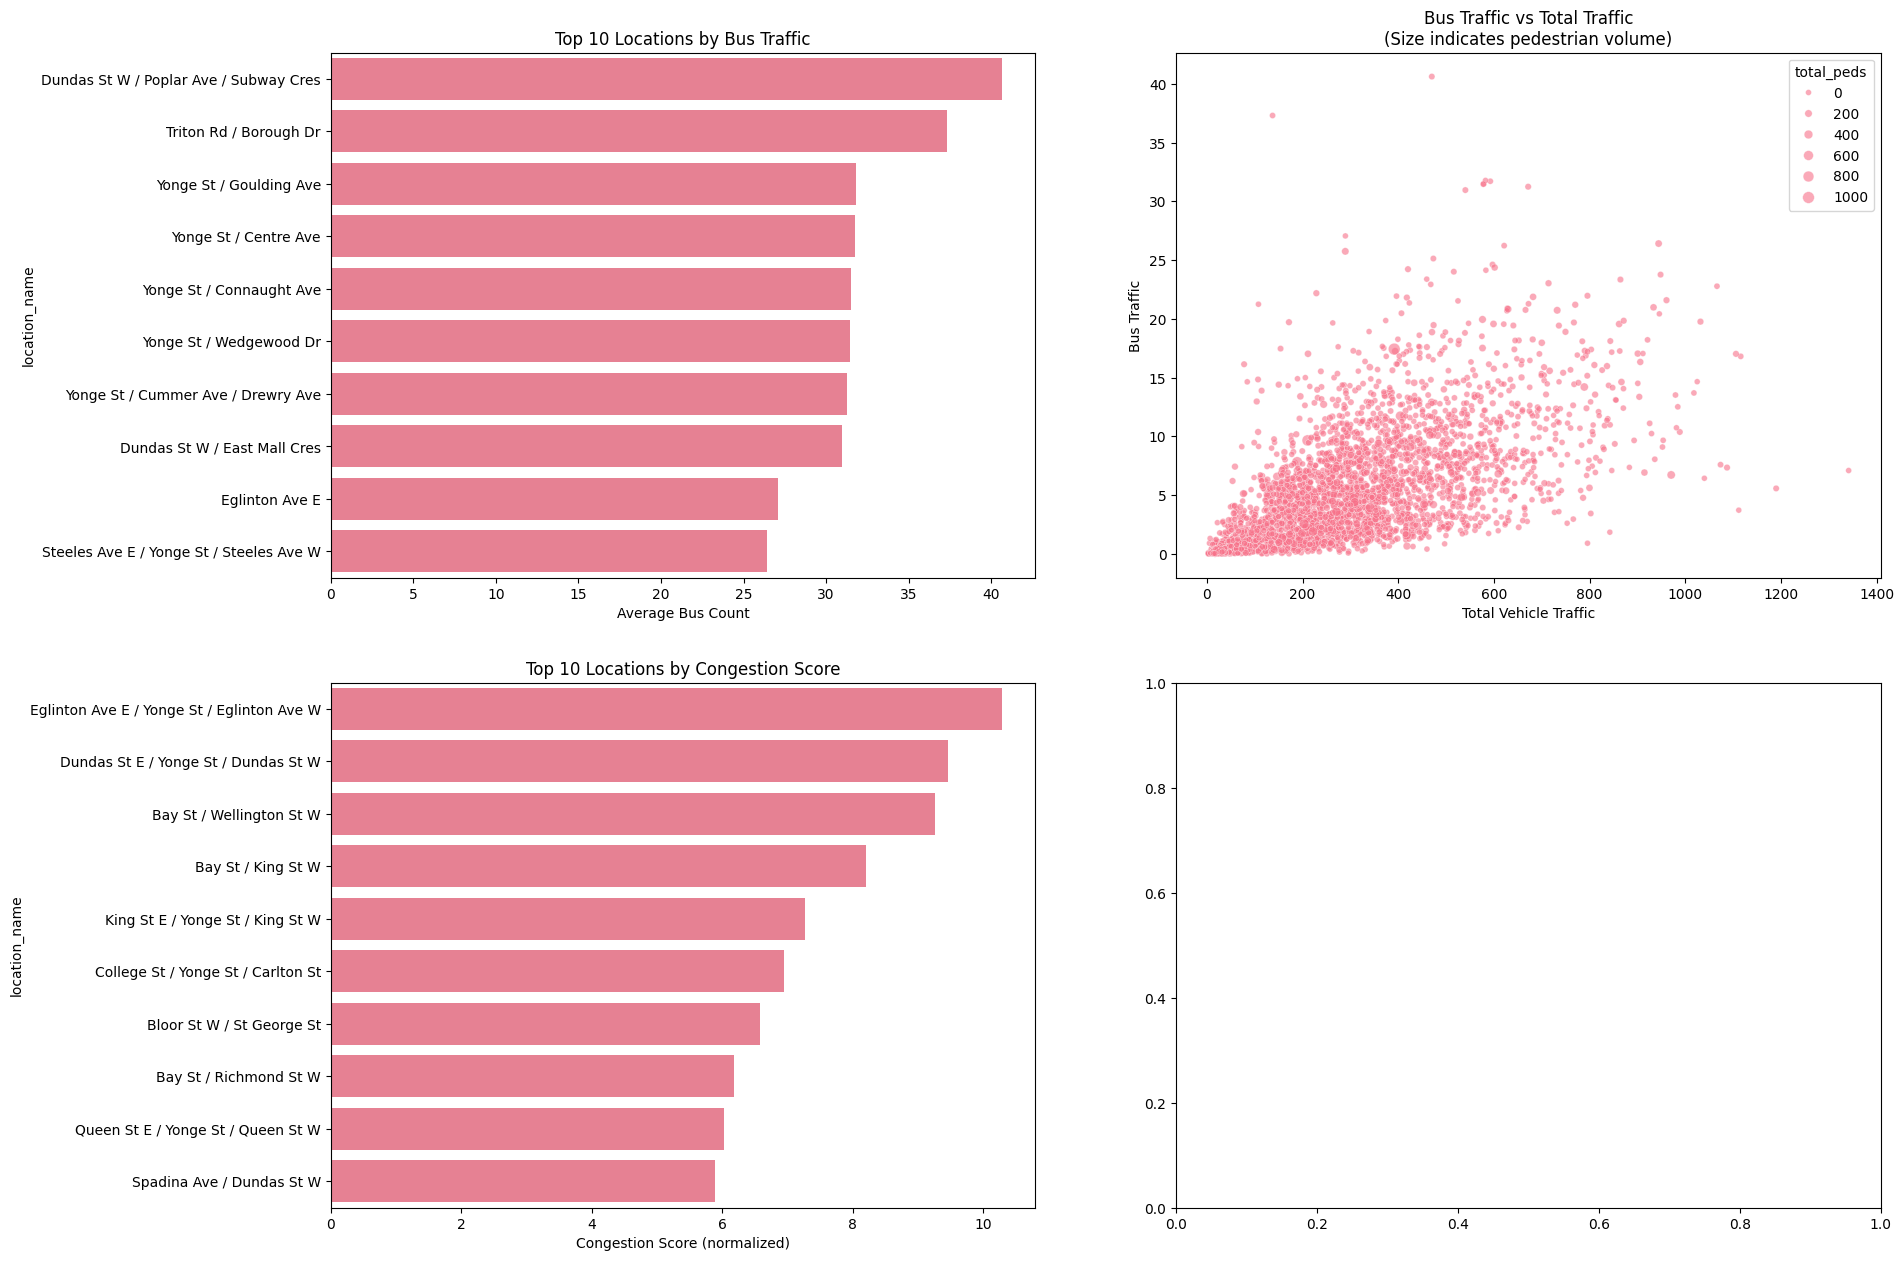

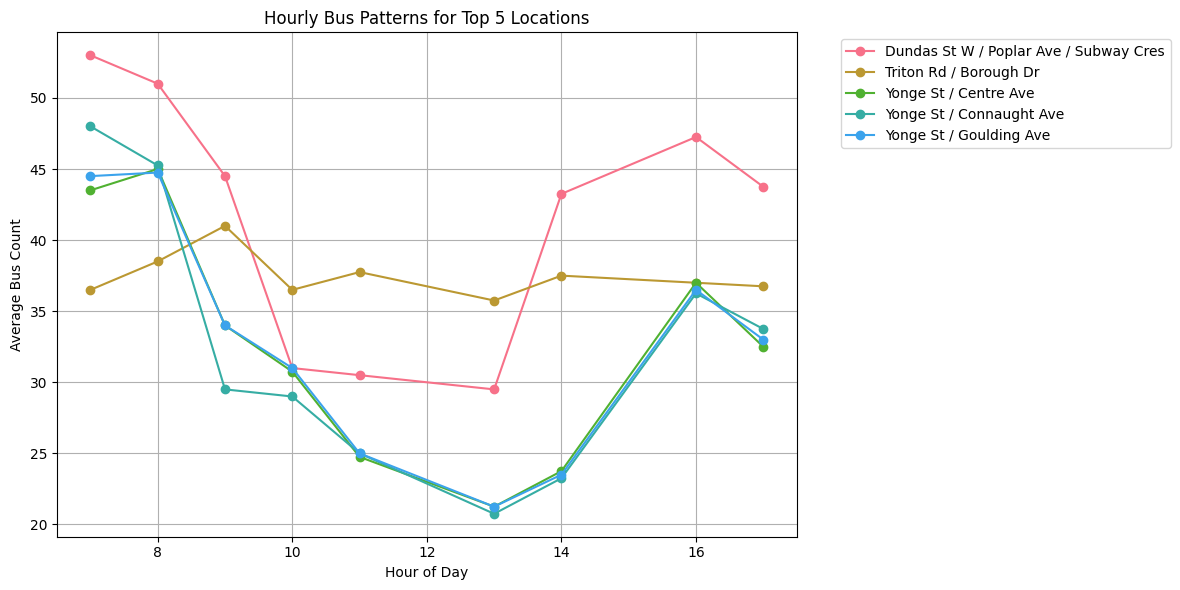

Traffic Management Analysis for High Bus Traffic Locations
--------------------------------------------------------------------------------

Location: Dundas St W / Poplar Ave / Subway Cres
Average Daily Metrics:
- Bus Traffic: 40.6 buses
- Vehicle Traffic: 470.2 vehicles
- Pedestrian Volume: 49.4 pedestrians
- Bus/Traffic Ratio: 0.086
- Congestion Score: 3.52
Peak Hour Analysis:
- Busiest Hour: 7:00
- Peak Bus Traffic: 53.0 buses
Management Recommendations:
- Consider dedicated bus lanes due to high bus-to-traffic ratio
- Implement pedestrian safety measures due to high foot traffic
- Consider bus schedule optimization during peak hours
- Priority location for traffic signal optimization
- Consider implementing smart traffic management systems

Location: Triton Rd / Borough Dr
Average Daily Metrics:
- Bus Traffic: 37.3 buses
- Vehicle Traffic: 137.2 vehicles
- Pedestrian Volume: 26.3 pedestrians
- Bus/Traffic Ratio: 0.272
- Congestion Score: 2.73
Peak Hour Analysis:
- Busiest Hour: 9:

In [15]:
# Create a comprehensive analysis of locations with high bus traffic
plt.figure(figsize=(20, 15))

# 1. Calculate key metrics for each location
location_metrics = df.groupby('location_name').agg({
    'total_bus': 'mean',
    'total_traffic': 'mean',
    'n_appr_peds': 'mean',  # pedestrian traffic
    's_appr_peds': 'mean',
    'e_appr_peds': 'mean',
    'w_appr_peds': 'mean'
}).reset_index()

# Calculate additional metrics
location_metrics['total_peds'] = (location_metrics['n_appr_peds'] + 
                                location_metrics['s_appr_peds'] + 
                                location_metrics['e_appr_peds'] + 
                                location_metrics['w_appr_peds'])
location_metrics['bus_to_traffic_ratio'] = location_metrics['total_bus'] / location_metrics['total_traffic']
location_metrics['congestion_score'] = (
    (location_metrics['total_bus'] / location_metrics['total_bus'].mean()) +
    (location_metrics['total_traffic'] / location_metrics['total_traffic'].mean()) +
    (location_metrics['total_peds'] / location_metrics['total_peds'].mean())
) / 3

# 1. Top locations by bus traffic with context
plt.subplot(2, 2, 1)
top_bus_locations = location_metrics.nlargest(10, 'total_bus')
sns.barplot(data=top_bus_locations, x='total_bus', y='location_name')
plt.title('Top 10 Locations by Bus Traffic')
plt.xlabel('Average Bus Count')

# 2. Bus to Traffic Ratio for top bus locations
plt.subplot(2, 2, 2)
sns.scatterplot(data=location_metrics, 
                x='total_traffic', 
                y='total_bus',
                size='total_peds',
                alpha=0.6)
plt.title('Bus Traffic vs Total Traffic\n(Size indicates pedestrian volume)')
plt.xlabel('Total Vehicle Traffic')
plt.ylabel('Bus Traffic')

# 3. Congestion Score Distribution
plt.subplot(2, 2, 3)
top_congested = location_metrics.nlargest(10, 'congestion_score')
sns.barplot(data=top_congested, x='congestion_score', y='location_name')
plt.title('Top 10 Locations by Congestion Score')
plt.xlabel('Congestion Score (normalized)')

# 4. Hourly patterns for top 5 bus locations
plt.subplot(2, 2, 4)
top_5_locations = location_metrics.nlargest(5, 'total_bus')['location_name']
hourly_patterns = df[df['location_name'].isin(top_5_locations)].pivot_table(
    values='total_bus',
    index='hour',
    columns='location_name',
    aggfunc='mean'
)
hourly_patterns.plot(marker='o')
plt.title('Hourly Bus Patterns for Top 5 Locations')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bus Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Detailed Analysis Print-out
print("Traffic Management Analysis for High Bus Traffic Locations")
print("-" * 80)

# Analyze top 10 locations
top_10_locations = location_metrics.nlargest(10, 'total_bus')
for _, loc in top_10_locations.iterrows():
    print(f"\nLocation: {loc['location_name']}")
    print(f"Average Daily Metrics:")
    print(f"- Bus Traffic: {loc['total_bus']:.1f} buses")
    print(f"- Vehicle Traffic: {loc['total_traffic']:.1f} vehicles")
    print(f"- Pedestrian Volume: {loc['total_peds']:.1f} pedestrians")
    print(f"- Bus/Traffic Ratio: {loc['bus_to_traffic_ratio']:.3f}")
    print(f"- Congestion Score: {loc['congestion_score']:.2f}")
    
    # Get peak hours for this location
    location_data = df[df['location_name'] == loc['location_name']]
    peak_hour = location_data.groupby('hour')['total_bus'].mean().idxmax()
    peak_bus = location_data.groupby('hour')['total_bus'].mean().max()
    
    print(f"Peak Hour Analysis:")
    print(f"- Busiest Hour: {peak_hour}:00")
    print(f"- Peak Bus Traffic: {peak_bus:.1f} buses")
    
    # Traffic management recommendations
    print("Management Recommendations:")
    
    if loc['bus_to_traffic_ratio'] > location_metrics['bus_to_traffic_ratio'].mean():
        print("- Consider dedicated bus lanes due to high bus-to-traffic ratio")
    
    if loc['total_peds'] > location_metrics['total_peds'].mean():
        print("- Implement pedestrian safety measures due to high foot traffic")
    
    if peak_bus > location_metrics['total_bus'].mean() * 2:
        print("- Consider bus schedule optimization during peak hours")
    
    if loc['congestion_score'] > location_metrics['congestion_score'].mean() + location_metrics['congestion_score'].std():
        print("- Priority location for traffic signal optimization")
        print("- Consider implementing smart traffic management systems")

print("\nOverall Recommendations for Traffic Management:")
print("-" * 50)
print("1. Locations requiring immediate attention (Congestion Score > 2 std dev):")
critical_locations = location_metrics[
    location_metrics['congestion_score'] > 
    (location_metrics['congestion_score'].mean() + 2 * location_metrics['congestion_score'].std())
]['location_name'].tolist()
for loc in critical_locations:
    print(f"   - {loc}")

print("\n2. Suggested Interventions by Category:")
print("High Bus Traffic:")
print("- Implement dedicated bus lanes")
print("- Optimize bus stop locations")
print("- Consider bus priority signaling")

print("\nHigh Pedestrian Volume:")
print("- Enhance pedestrian crossings")
print("- Implement pedestrian countdown signals")
print("- Consider pedestrian islands for wide intersections")

print("\nPeak Hour Management:")
print("- Dynamic traffic signal timing")
print("- Real-time traffic monitoring")
print("- Consider congestion pricing during peak hours")

1. Dedicated Bus Lanes for High Transit Areas
Locations with high bus-to-traffic ratios should implement bus-only lanes to improve efficiency.
Priority Areas: Dundas St W / Poplar Ave / Subway Cres.
2. Traffic Signal Optimization for Peak Hours
Adaptive traffic signals should be implemented to accommodate peak-hour transit congestion.
Priority Areas: Triton Rd / Borough Dr, Dundas St W / Poplar Ave / Subway Cres.
3. Pedestrian Safety Enhancements
High foot traffic areas need better crosswalks, pedestrian signals, and safety barriers.
Priority Areas: Dundas St W / Poplar Ave / Subway Cres.
4. Real-Time Traffic Monitoring & Smart Traffic Systems
Implement real-time congestion monitoring for dynamic bus rerouting.
Congestion pricing during peak hours can discourage excessive private vehicle use.